# Healthcare Claims Analysis

This notebook analyzes healthcare insurance data to find cost drivers, evaluate the impact of smoking, age, and BMI on charges, and uncover regional trends using Python and data visualization.



In [70]:
# Step 1: Import the pandas library
import pandas as pd

# Step 2: Read the dataset from the correct folder
df = pd.read_csv('../raw_data/insurance.csv')

# Step 3: Display the first 5 rows of the data
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
# Step 4: Check for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
# Step 5: Remove duplicates (if any)
df = df.drop_duplicates()

# Confirm shape after removing duplicates
df.shape


(1337, 7)

In [73]:
# Step 6: View data types and quick stats
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


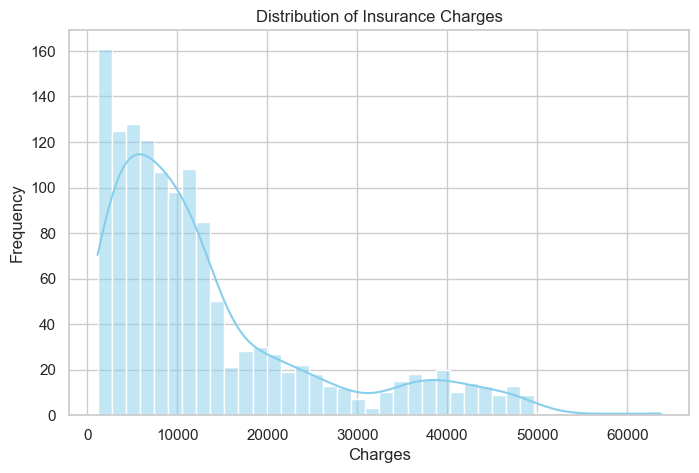

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Step 7: Distribution of charges
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


/var/folders/mw/rftbgp4n2rz908b780901yc00000gn/T/ipykernel_2267/785174688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


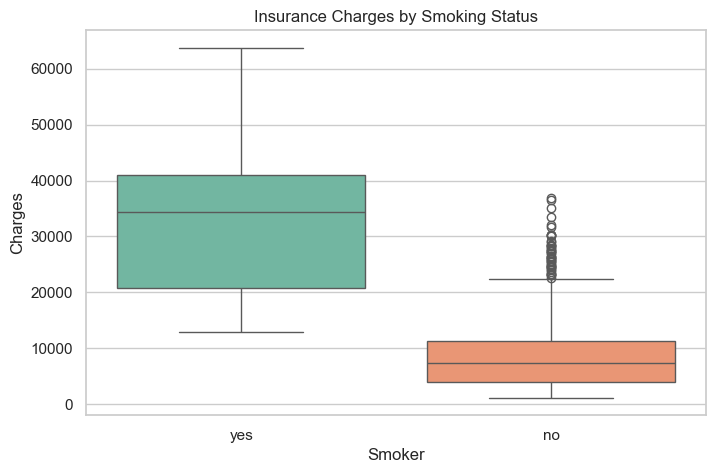

In [75]:
# Step 8: Charges comparison - Smokers vs Non-Smokers
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


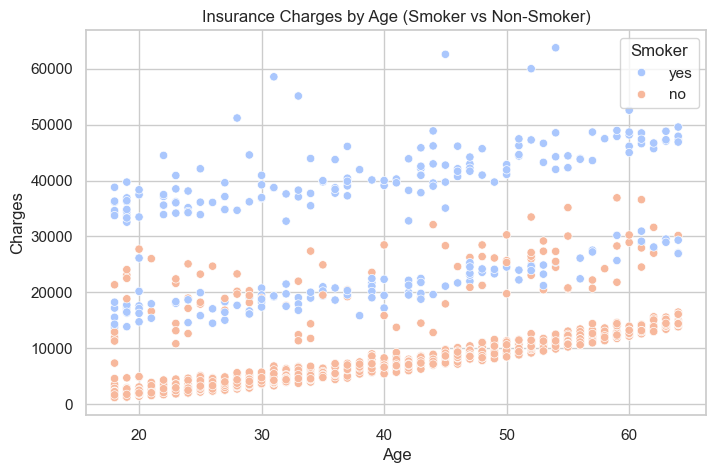

In [76]:
# Step 9: Charges vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Insurance Charges by Age (Smoker vs Non-Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


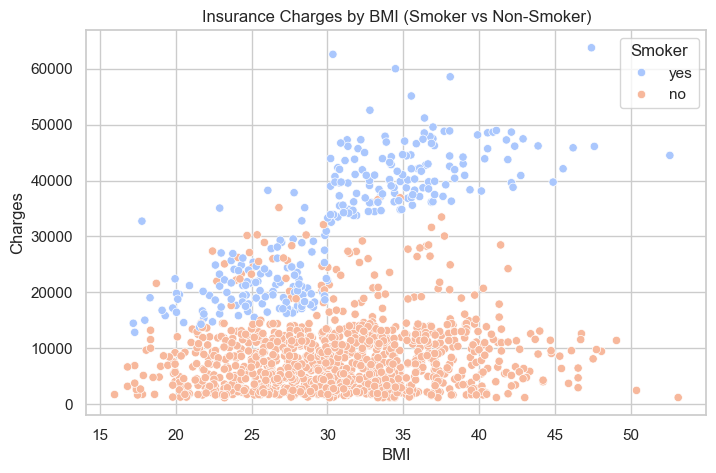

In [77]:
# Step 10: Charges vs. BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Insurance Charges by BMI (Smoker vs Non-Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


/var/folders/mw/rftbgp4n2rz908b780901yc00000gn/T/ipykernel_2267/4268734630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, estimator='mean', palette='pastel')


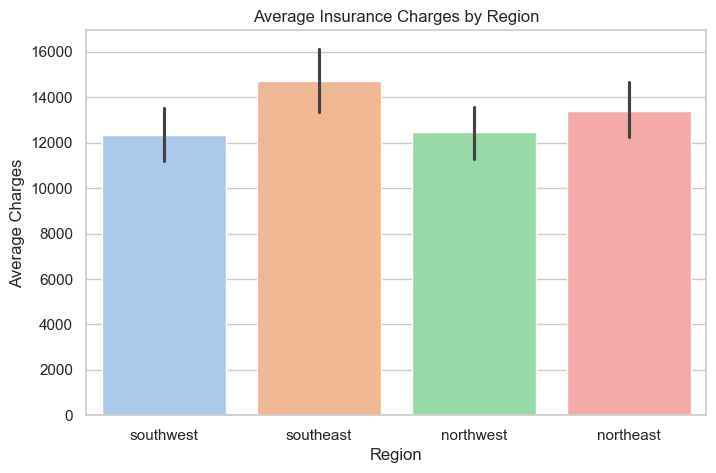

In [78]:
# Step 11: Average charges by region
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='charges', data=df, estimator='mean', palette='pastel')
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()
